# Data Mining HW 1_3

---

## Table of Contents
1. Data 
2. Data Preprocessing
 - 3.2 Feature Creation
 - 3.3 Feature Subset Selection
 - 3.4 Atrribute Transformation / Aggregation
 - 3.5 Dimensionality Reduction
 - 3.6 Discretization and Binarization
4. Data Exploration
5. Data Classification
6. References

---

## 1. Data
Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data : The dataset contains a sentiment and comment columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'.

 [Hugging Face website](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data) 

In [18]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [19]:
categories = ['nostalgia', 'not nostalgia']
categories

['nostalgia', 'not nostalgia']

In [20]:
print ('Length of the data frame', len(df))

# An example of what the subset contains
print("First comment:", df['comment'][0].split(" "))

print ("First sentiment:", df['sentiment'][0])

Length of the data frame 1500
First comment: ['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now.', 'Although', 'we', 'have', 'many', 'singers', 'now,', 'but,', 'I', 'can', 'vouch', 'for', 'Jim', 'Reeves', 'all', 'the', 'time.', 'You', 'feel', 'relaxed,', 'emotional', 'and', 'loving.', 'Thank', 'you', 'Lord', 'for', 'his', 'life.']
First sentiment: not nostalgia


In [21]:
print (df.iloc[:10, 0])

print(df[df["sentiment"] == "nostalgia"].iloc[::10][0:5])

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: sentiment, dtype: object
    sentiment                                            comment
1   nostalgia  The mist beautiful voice ever I listened to hi...
18  nostalgia  My Grandparents had a pub in the 1970's, this ...
32  nostalgia  I remember my Mom listening to Jim over and ov...
50  nostalgia  If I remember correctly, this song came out af...
71  nostalgia  Gosh does this bring back memories. Nearly eve...


### Check Missing Values and dealing with duplicate data

In [22]:
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [23]:
print ('Duplicated number of the all columns', sum(df.duplicated()))
print ('Duplicated number of the comment column', sum(df.duplicated('comment')))

print ('Length before removing the duplicated data:', len(df))
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
#Keep = True -> Drop both duplicate data / Keep = False -> Remain one of the duplicate data

print ('Length after removing the duplicated data:', len(df))

Duplicated number of the all columns 1
Duplicated number of the comment column 1
Length before removing the duplicated data: 1500
Length after removing the duplicated data: 1498


sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

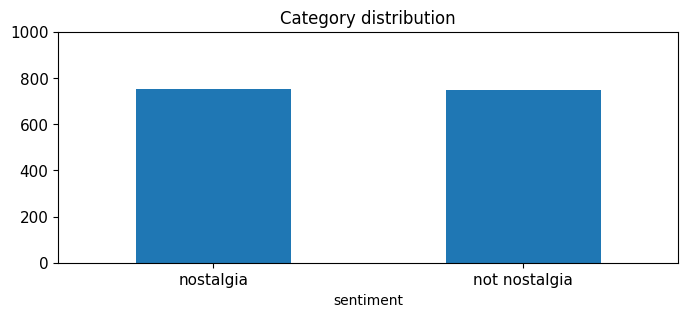

In [24]:
import matplotlib.pyplot as plt
print(df.sentiment.value_counts())

# plot barchart for X
df.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

---

## 2.  Data Preprocessing

### 2.1 Feature Creation

In [25]:
import nltk
# takes a like a minute or two to process
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

df[0:4]['unigrams']

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [26]:
df[0:4]

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


---

### 2.2 Feature subset selection
To generate a <font color='pink'>document-term matrix</font> from the original dataset using TfidVectorizer. Sklearn website: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) How Tfid weight is calculated can be referred to the following website: [wiki](https://zh.wikipedia.org/zh-tw/Tf-idf)

<font color='pink'>Document-term matrix with row represents document and column represents term, the frequency of the word in the document would be the value. This converts textual data into a structured numeric form.</font>

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect = TfidfVectorizer()
df_counts = tfid_vect.fit_transform(df.comment)
print (df_counts[0])

#first value -> np.int32(0) : represent the index of the document
#second value -> np.int32(1598) : represent the index of the word
#third value: -> 0.105 : represent the tfid weight of that word

  (np.int32(0), np.int32(1598))	0.10512242613948135
  (np.int32(0), np.int32(3570))	0.1395362132685669
  (np.int32(0), np.int32(2973))	0.13337598417101282
  (np.int32(0), np.int32(3650))	0.09116875732490397
  (np.int32(0), np.int32(1470))	0.17742899300775078
  (np.int32(0), np.int32(3534))	0.10583883750913557
  (np.int32(0), np.int32(3282))	0.08098852685035728
  (np.int32(0), np.int32(2028))	0.08425574837468117
  (np.int32(0), np.int32(3336))	0.056549174016642896
  (np.int32(0), np.int32(1606))	0.1189173359366918
  (np.int32(0), np.int32(233))	0.1978969806456795
  (np.int32(0), np.int32(3284))	0.15159319854457548
  (np.int32(0), np.int32(3328))	0.18796232534895616
  (np.int32(0), np.int32(1651))	0.22760529302349403
  (np.int32(0), np.int32(1512))	0.09514910066637612
  (np.int32(0), np.int32(1249))	0.1985326064308052
  (np.int32(0), np.int32(323))	0.10632598515668054
  (np.int32(0), np.int32(214))	0.14662971231064667
  (np.int32(0), np.int32(2341))	0.061587482183078086
  (np.int32(0), n

In [28]:
print ("The shape of document matrix", df_counts.shape)

#First document : the number of comment
#Second dimension : the number of unique words(下表的紅框: 總共有多少個字數)

#Using index to know the first term
print ("The first term is ", tfid_vect.get_feature_names_out()[1598])

#第0~10的INDEX代表哪一些字
print ("The term with the first to tenth index is", tfid_vect.get_feature_names_out()[0:10])

The shape of document matrix (1498, 3730)
The first term is  he
The term with the first to tenth index is ['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12']


Plot the heatmap of the first twenty features and most frequent twenty features in the first twenty comments.

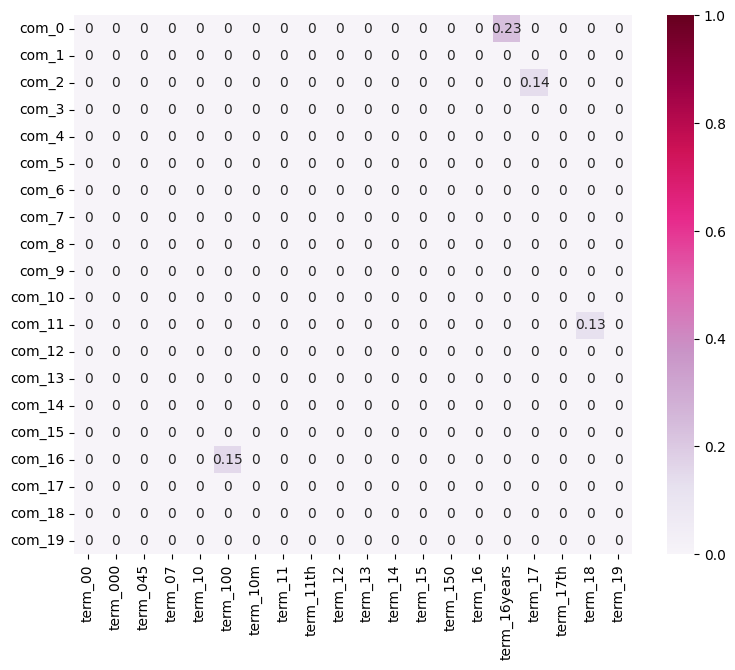

In [29]:
import seaborn as sns
import numpy as np

plot_x = ["term_"+str(i) for i in tfid_vect.get_feature_names_out()[0:20]] # first twenty features only
plot_y = ["com_"+ str(i) for i in list(df.index)[0:20]]                     # obtain document index (first twenty comments)
plot_z = df_counts[0:20, 0:20].toarray()                                    #X_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

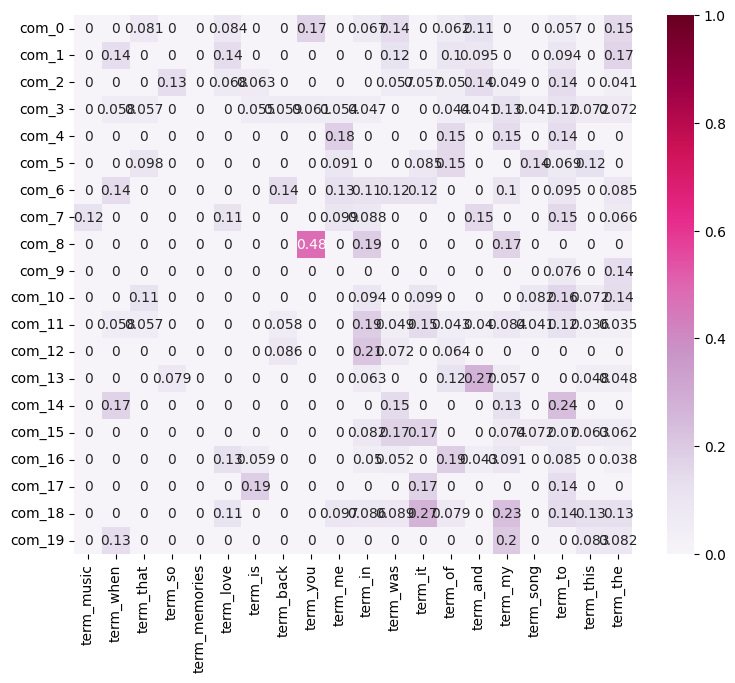

In [30]:
word_freq = np.array(df_counts.sum(axis=0)).flatten()
top_20_indices = word_freq.argsort()[-20:]

plot_x = ["term_" + str(i) for i in tfid_vect.get_feature_names_out()[top_20_indices]]
plot_y = ["com_" + str(i) for i in list(df.index)[:20]]
plot_z = df_counts[:20, top_20_indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### 2.3 Attribute Transformation / Aggregation
To <font color='pink'>generate a simple distribution of the words</font> found in all the entire set of articles. On the topic of <font color='pink'>attribute transformation</font>, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. 

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [31]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []

for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [32]:
df_counts.shape

(1498, 3730)

In [33]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies

array([0.34185399, 0.32263121, 0.18634989, ..., 0.35901314, 0.31860106,
       0.16351513])

In [34]:
import plotly.express as px

x = tfid_vect.get_feature_names_out()[:500]
y = term_frequencies[:500]

fig = px.bar(x = x, y = y, height = 300, labels={'x': 'Words', 'y' : 'Frequency of the word'}, text_auto = '2s')
fig.show()

x2, x2_sorted, y2 = [], [], []

#Sorte frequency
for i in range(500):
    if term_frequencies [i] != 1:
        x2.append(tfid_vect.get_feature_names_out()[i])
        y2.append(term_frequencies[i])

y2_sorted = sorted(y2, reverse = True)
y2_sorted_index = (list(np.argsort(y2))) #從小到大的排序

for i in range(500):
    x2_sorted.append(x2[y2_sorted_index[499 - i]])

fig_2 = px.bar(x = x2_sorted, y = y2_sorted, height = 300, labels={'x': 'Words', 'y' : 'Frequency of the word'}, text_auto = '2s')
fig_2.show()


---

###  Finding frequent patterns

PAMI (PAttern MIning) : Python-based library designed to empower data scientists by providing the necessary tools to uncover hidden patterns within large datasets.
Github website: [PAMI](https://github.com/UdayLab/PAMI?tab=readme-ov-file)

**Transactional Data**

Convert our text data into transactional data. A transactional database is a set of transactions where  each transaction consists of a unique identifier (TID) and a set of items.

In this structure:
TID refers to the unique identifier of each transaction (often ignored by PAMI to save storage space).
Items refer to the elements in each transaction, which could be either integers or strings (e.g., products, words, etc.).
When preparing text data, we need to transform sentences or documents into a similar format, where <font color= 'pink'>each sentence or document becomes a transaction, and the words within it become the items.</font>

In our scenario, what we need is to <font color= 'pink'>mine patterns that can be representative to **each category**</font>, in this way we will be able to differentiate each group of data more easily, for that we will need to first modify our document-term matrix to be able to work for each category, for this we will do the following:

In [35]:
# Create term freuency matrix

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each category
categories = df['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(dataframe):
    tfid_vect = TfidfVectorizer()  # Initialize the CountVectorizer
    df_counts = tfid_vect.fit_transform(dataframe['comment'])  # Transform the text data into word counts
   
    # Get the unique words (vocabulary) from the vectorizer
    words = tfid_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [36]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number = 0 #You can change it from 0 to 1
print(f"Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

Term-Document Frequency DataFrame for Category nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.135932,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.196577,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.355567
746,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
747,0.0,0.0,0.0,0.0,0.0,0.225266,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
748,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [48]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])

category_number = 0 #You can change it from 0 to 1
# Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category not nostalgia:


,00,000,045,10,100,10m,11,12,14,15,...,younger,youngest,youngsters,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
filtered_term_document_dfs

{'not nostalgia':       00  000  045   10  100  10m   11   12   14   15  ...  younger  youngest  \
 0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...       ...   
 743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
 747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   

In [52]:
#Convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in filtered_term_document_dfs:
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(filtered_term_document_dfs[category])

    obj.convert2TransactionalDatabase(f'td_freq_db_3_{category}.csv', '>=', 0)
    #1(最後) : threshold value meaning the threshold of the term frequency 
    # 若字的frequency 大於等於1: 則會取其term進入到transaction data中 


In [46]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj = tds.TransactionalDatabase('td_freq_db_3_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 0
Number of items : 0


ValueError: min() arg is an empty sequence

<font color='pink'>FPGrowth algorithm </font>from PAMI, and for that we need to determine the <font color='pink'>*minimum support* (frequency)</font> that our algorithm will use to mine for patterns in our transactions. 

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture important patterns that show real connections in the data, but we also want to avoid too many unimportant patterns. For this dataset, we've chosen a minSup of 5.

In [321]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5

obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()

print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

frequentPatternsDF_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 363
Runtime: 0.008999824523925781


,Patterns,Support
0,angel,5
1,town,5
2,everyday,5
3,able,5
4,married,5
...,...,...
358,ever,28
359,would,28
360,go,28
361,takes,30


In [322]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

frequentPatternsDF_not_nostalgia

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 355
Runtime: 0.008001089096069336


,Patterns,Support
0,leave,5
1,number,5
2,father,5
3,remember,5
4,100,5
...,...,...
350,elvis,21
351,every,21
352,loved,21
353,them,21


In [323]:
#Find out the unique patterns in different categories, which could significantly improve the classification process.
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes #計算在每個類別字出現的次數
pattern_counts = {}
for dataframe in dfs:
    for pattern in dataframe['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe 將只出現一次的字挑選出來
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}


# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(dataframe) for dataframe in dfs)

# Calculate how many patterns were discarded 把出現次數多於一次的字刪掉
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones 將指出先次的字在每個類別中挑出來
filtered_dfs = []
for dataframe in dfs:
    filtered_df = dataframe[dataframe['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
194     takes       30
192      ever       28
193     would       28
186       kid       26
190      wish       26
..        ...      ...
4      senior        5
3     married        5
2        able        5
1    everyday        5
0        town        5

[382 rows x 2 columns]
Number of patterns discarded: 336


In [382]:
#Convert the patterns into binary data within the columns of our document-term matrix

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_text'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix 建立(row: 所有document數量 col:只出現一次字)的Data frame 此例:(n_row,n_col) == (1498,382)
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)  #if a paatern_word exists on the document or not! 確保每個pttern_word都是在X['tokenized_text]中(確保都是tokenized的字)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df #tdm_df(unique word) / pattern_matrix

,00,000,045,07,10,100,10m,11,11th,12,...,girls,carpenters,does anyone,weeks,took,senior,married,able,everyday,town
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

### 3.5 Dimensionality Reduction

Using **Principal Component Analysis (PCA)** , **t-Distributed Stochastic Neighbor Embedding (t-SNE)** and **Uniform Manifold Approximation and Projection (UMAP)**.

Input: Raw term-vector matrix | Output: Projections 

In [327]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
df_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)        # n_component : the dimension we would like to reduce to 
df_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [328]:
print ("Shape of original dataframe", tdm_df.shape)
print ("Shape of after using PCA", df_pca_tdm.shape)
print ("Shape of after using tSNE", df_tsne_tdm.shape)
print ("Shape of after using umap", df_umap_tdm.shape)

Shape of original dataframe (1498, 3730)
Shape of after using PCA (1498, 2)
Shape of after using tSNE (1498, 2)
Shape of after using umap (1498, 2)


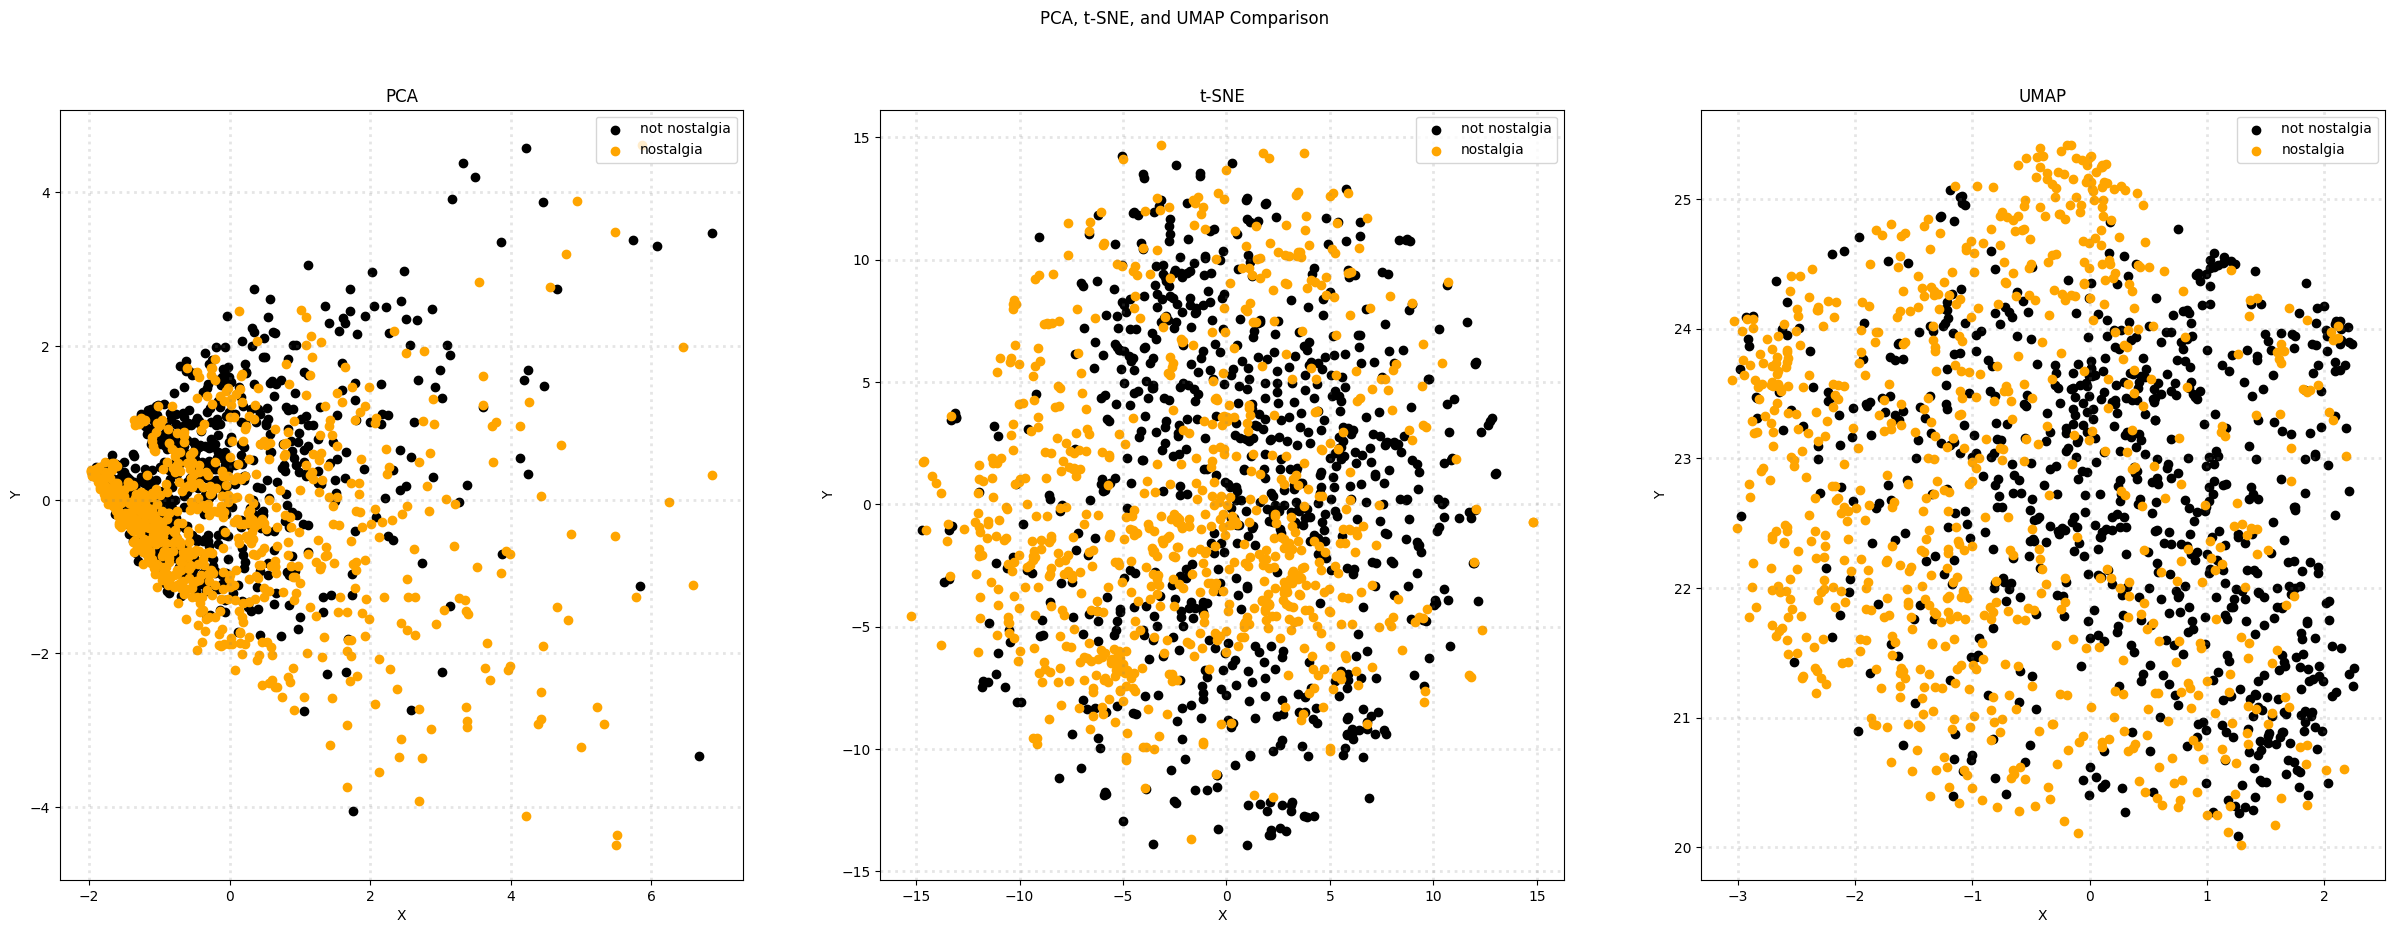

In [329]:
# Plot the results in subplots
col = ['black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

Try with our pattern augmented data:

In [330]:
#Applying dimensionality reduction( PCA, t-SNE, and UMAP) with both the document-term frequency data and the pattern derived data

df_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

In [331]:
print ("Shape of original dataframe", augmented_df.shape)
print ("Shape of after using PCA", df_pca_aug.shape)
print ("Shape of after using tSNE", df_tsne_aug.shape)
print ("Shape of after using umap", df_umap_aug.shape)

Shape of original dataframe (1498, 4112)
Shape of after using PCA (1498, 2)
Shape of after using tSNE (1498, 2)
Shape of after using umap (1498, 2)


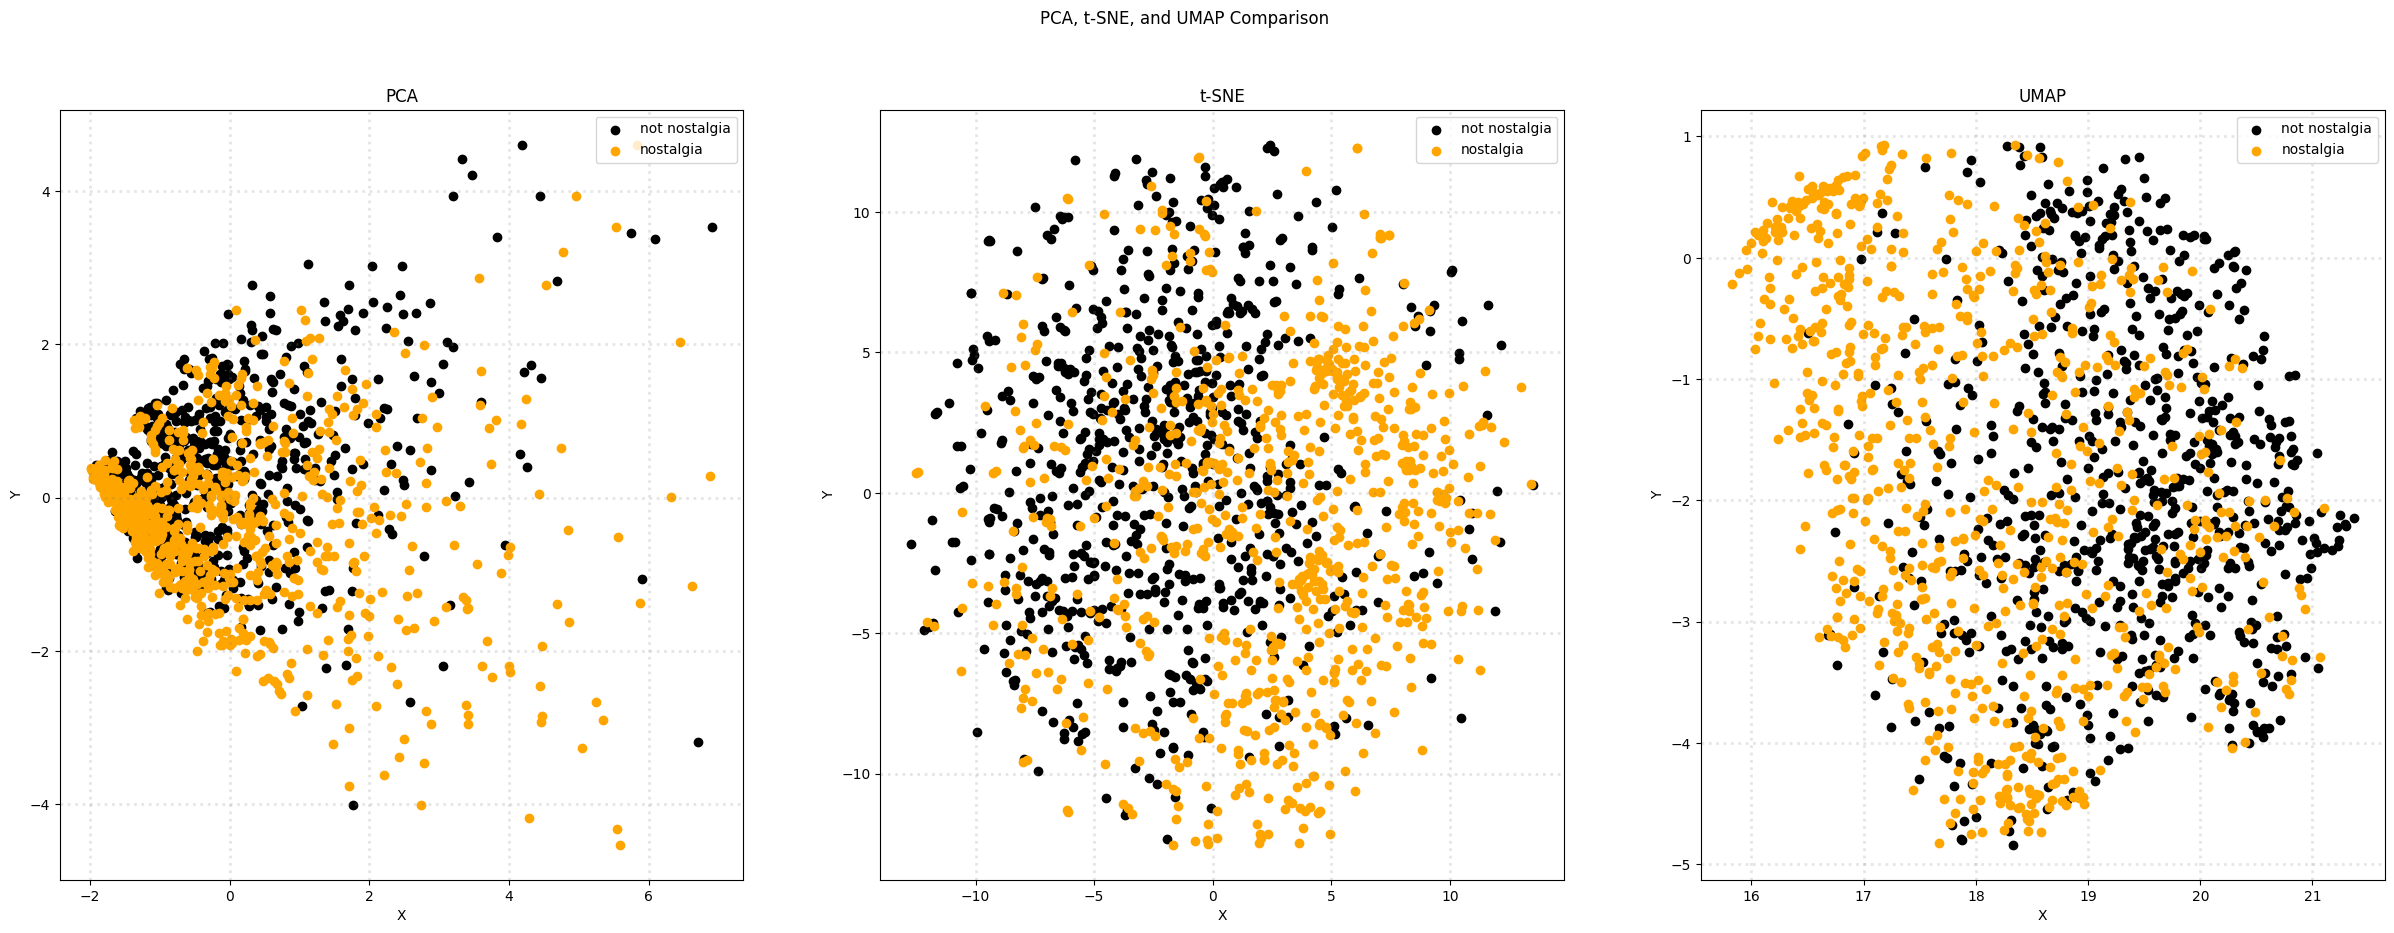

In [332]:
# Plot the results in subplots
col = [ 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_aug, 'PCA')
plot_scatter(axes[1], df_tsne_aug, 't-SNE')
plot_scatter(axes[2], df_umap_aug, 'UMAP')

plt.show()

PCA: 
From the 2D visualization above, we can not see a separation in the data. I suggest the reason is that PCA works better in linear data type.
The PCA visualization in augmented dataframe hasn't changed much from the previous version. This is likely because the original document-term matrix still dominates what the algorithm captures.

t-SNE:
In the t-SNE graph, we observe a scattered distribution, with all categories intermixed. 
The the t-SNE graph in augmented dataframe is almost the same but mirrored along the y-axis as the pervious one, with only slight changes in how the data points are placed. This similarity might be due to the stability of the t-SNE algorithm just as the pervious notbook mentioned.

UMAP:
In the UMAP graph, we can observe that there is a slight separation between two categories. Although many of the data points are still intermixed, we can observed two clusters representing two categories.
The UMAP visualization in augmented dataframe shows more compact clusters for two categories. This is because UMAP uses a more complex distance metric, which might be making it easier to see differences between closer and further points.


### Try to reduce the dimension to 3, and plot the result use 3-D plot. 

In [333]:
df_pca_aug_3  = PCA(n_components=3).fit_transform(augmented_df.values)
df_tsne_aug_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
df_umap_aug_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

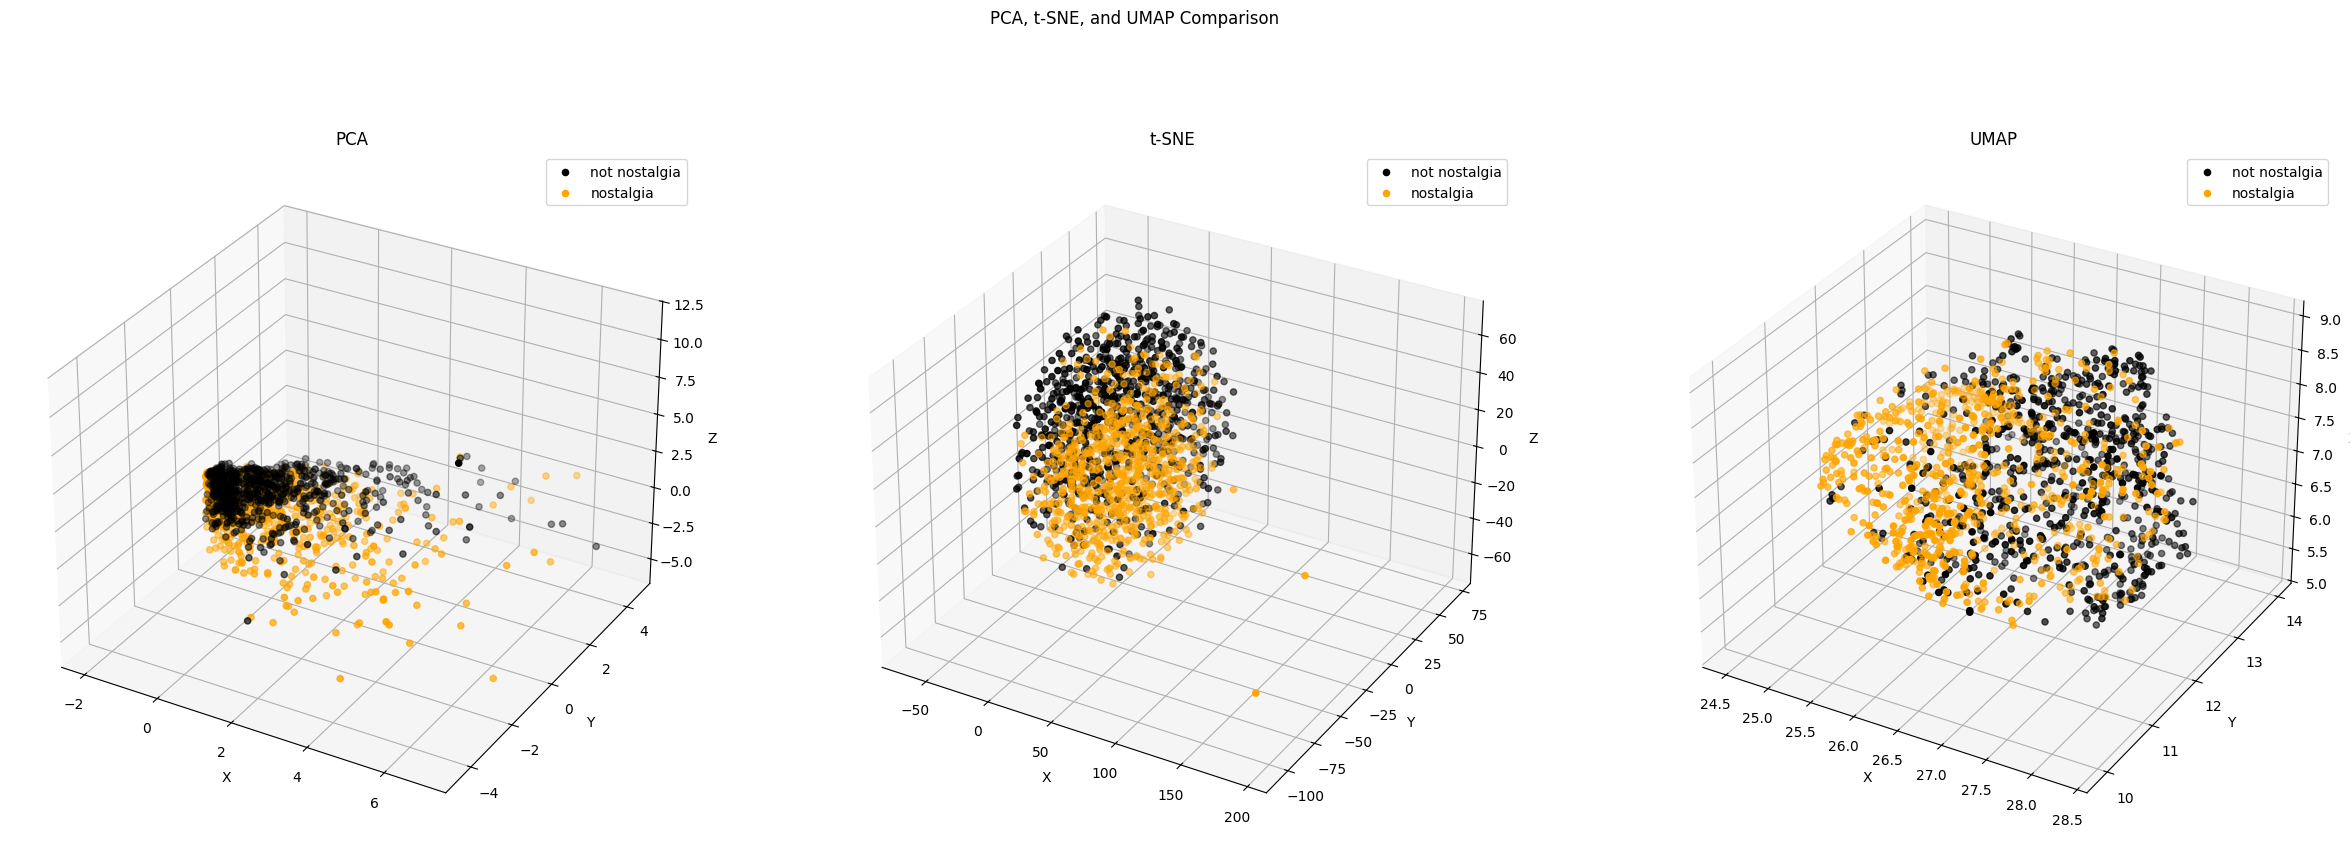

In [334]:
# Plot 3D with axes3d
from mpl_toolkits.mplot3d import Axes3D

col = ['black', 'orange']
categories = df['sentiment'].unique() 

fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(num, X_reduced, title):
    ax  = fig.add_subplot(1, 3, num, projection = '3d')

    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        zs = X_reduced[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(1, df_pca_aug_3, 'PCA')
plot_scatter(2, df_tsne_aug_3, 't-SNE')
plot_scatter(3, df_umap_aug_3, 'UMAP')

plt.show()

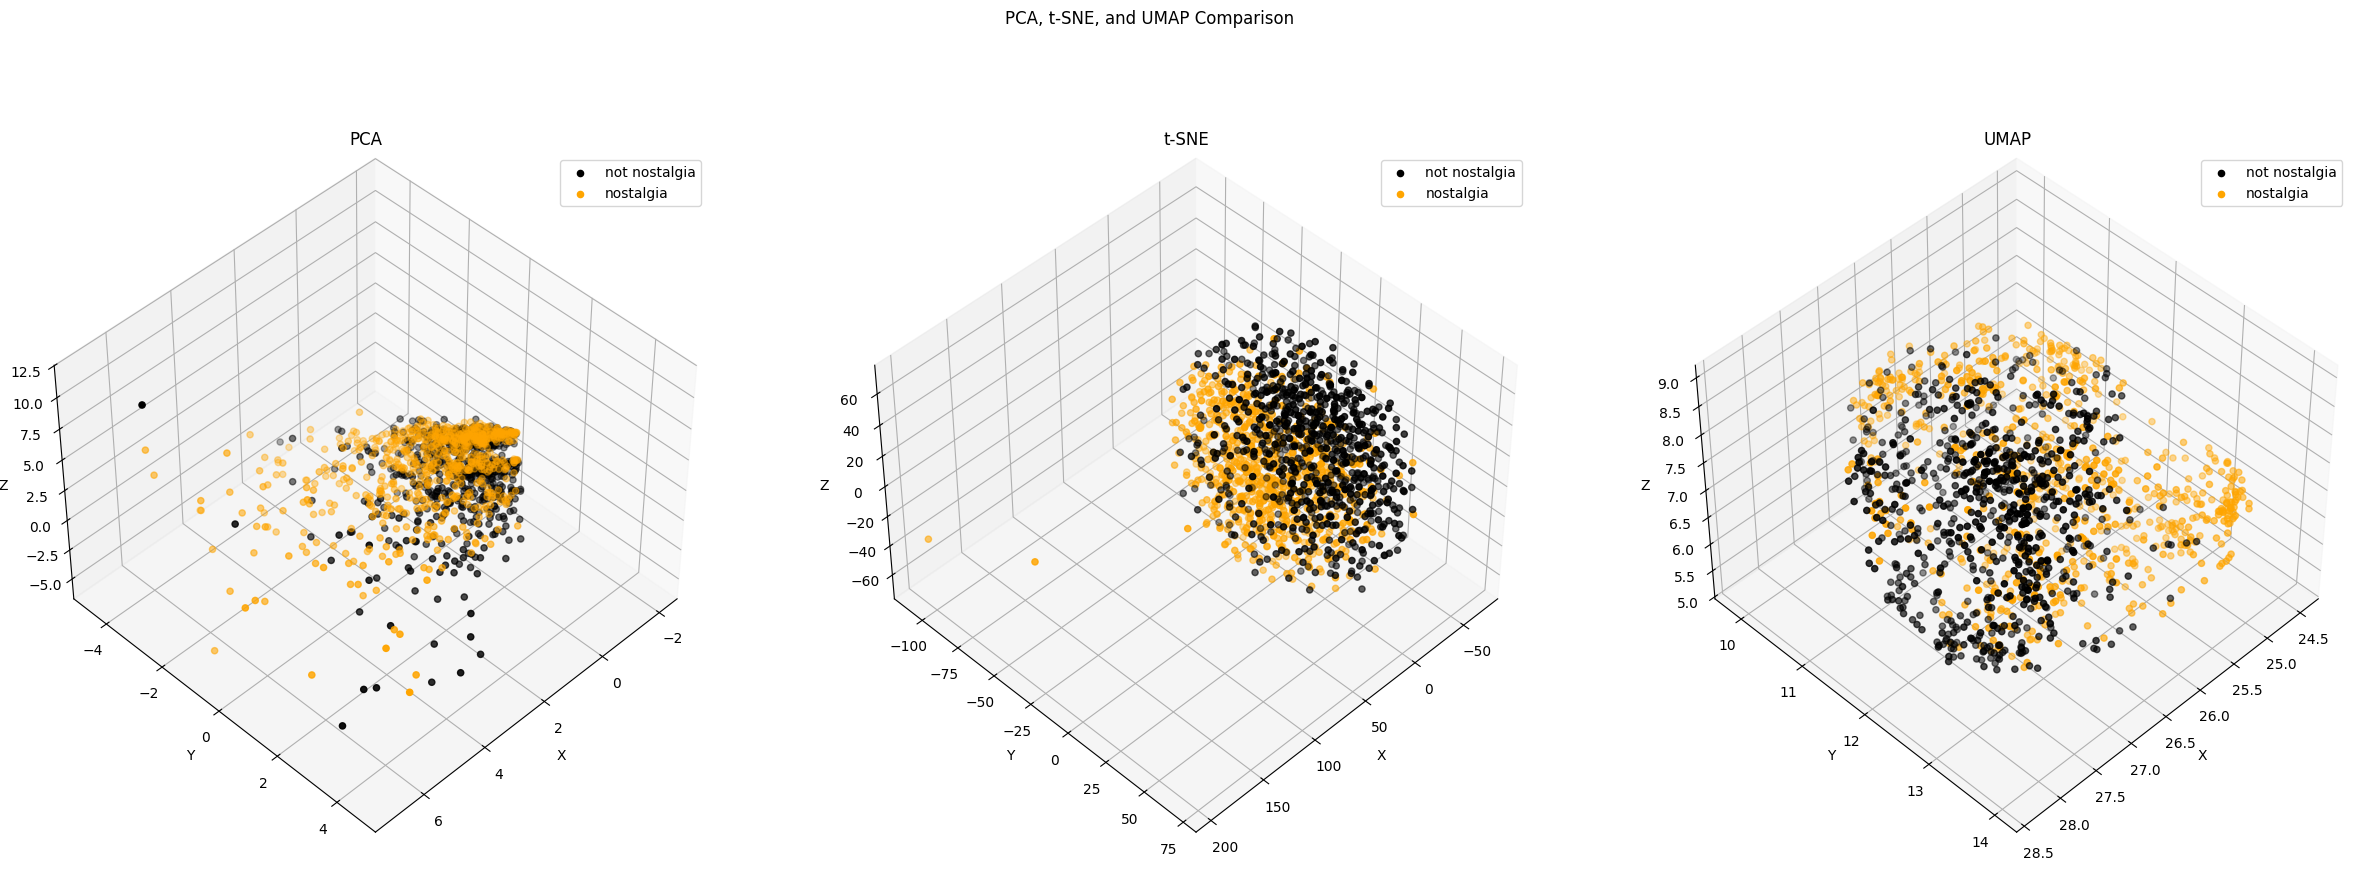

In [335]:
# Plot 3D with axes3d
from mpl_toolkits.mplot3d import Axes3D

col = ['black', 'orange']
categories = df['sentiment'].unique() 

fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(num, X_reduced, title):
    ax  = fig.add_subplot(1, 3, num, projection = '3d')

    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        zs = X_reduced[df['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(45, 45)

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(1, df_pca_aug_3, 'PCA')
plot_scatter(2, df_tsne_aug_3, 't-SNE')
plot_scatter(3, df_umap_aug_3, 'UMAP')

plt.show()

3D PCA visualization remains largely unchanged from the previous 2d version. There are no significant category differences on either axis. Just as previously mentioned, it is likely because PCA is not the best choice for the nonlinear dimension reduction.

We can observe from the t-SNE graph that there is a slight separation from two categories. The label with nit nistalgia and nostalgia form two clusters in the feature space that is showed above. 

The UMAP visualization exhibits the two categories still seem somewhat mixed together.

---

### 3.6 Discretization and Binarization
Given our current original dataset, we would like to transform one of the attributes, `sentiment`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. People from the machine learning community also refer to this transformation as <font color="pink">one-hot encoding</font>. 

In [336]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [347]:
df['bin_sentiment'] = mlb.transform(df['sentiment'])
df[0:9]

,sentiment,comment,unigrams,tokenized_text,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{Lord, and, can, life., days, still, for, to, ...",1
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{forgotten, and, still, Never, to, him, singin...",0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{leave, and, early., 17., around., but, to, my...",0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{leave, from, receive., and, can, Mary, greate...",1
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{everyday, me, songs, listening, played, to, m...",0
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{used, still, cry....because, heard, to, song,...",0
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{for, to, but, was, do, when, things., Jim, Re...",0
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{and, am, HAVE, to, puts, i, Jim, nostalgic, w...",0
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{always, are, in, Wherever, my, heart, you}",1


Take a look at the new attribute we have added to the `df` table. You can see that the new attribute, which is called `bin_sentiment`, contains an array of 0 and 1. The `1` is basically to indicate `not nostalgia`, while `0` indicates `nostalgia`.

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization**.

---

# 4. Data Exploration
Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [338]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [339]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [340]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [341]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity to reach out the relationship between these comments
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_22832\2709721319.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_22832\2709721319.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_22832\2709721319.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_22832\2709721319.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 to a 

---

# 5. Data Classification
 **Naive Bayes classifier** is a simple yet powerful algorithm commonly used for text classification tasks. Specifically, the Multinomial Naive Bayes classifier is particularly suited for datasets where features are represented by term frequencies, such as a document-term matrix, like the one we have.

- **Multinomial Naive Bayes:**
    The Multinomial Naive Bayes classifier works by <font color="pink">assuming that the features (words or terms in text data) follow a multinomial distribution.</font> In simple terms, <font color="pink">it calculates the probability of a document belonging to a particular category based on the frequency of words in that document, assuming independence between words</font> (the "naive" part of Naive Bayes). Despite this assumption, it often performs remarkably well for text data, especially when working with word count features. Now, when incorporating the binary matrix of patterns we have, it remains compatible because the binary values can be seen as a count of pattern occurrences (1 for present, 0 for absent). Although binary features are not true "counts," the Multinomial Naive Bayes classifier can still handle them without issue. 
    
We will follow a typical **70/30 split for the training and test set**. 

In [348]:
df

,sentiment,comment,unigrams,tokenized_text,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{Lord, and, can, life., days, still, for, to, ...",1
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{forgotten, and, still, Never, to, him, singin...",0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{leave, and, early., 17., around., but, to, my...",0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{leave, from, receive., and, can, Mary, greate...",1
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{everyday, me, songs, listening, played, to, m...",0
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o...","{him,..would, thing, know!..but, that!...he's,...",1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so...","{and, to, song, him, beautiful, you, when, you...",1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is...","{and, Dear, am, to, you, when, not, I, music.,...",1
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,...","{started, and, imagination., still, has, other...",0


In [385]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[["bin_sentiment", 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels eg.['not nostalgia', 'nostalgia']
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['sentiment'], test_size=0.3, random_state=42) #x: tdm_df-> without the binary pattern

In [387]:
print ("X_tain shape", X_train.shape)
print ("X_test shape", X_test.shape)

X_tain shape (1048, 3730)
X_test shape (450, 3730)


In [388]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8286    0.9486    0.8845       214
not nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [389]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42) #x: augmented_df -> with the binary pattern

In [390]:
print ("X_tain shape", X_train.shape)
print ("X_test shape", X_test.shape)

X_tain shape (1048, 4112)
X_test shape (450, 4112)


In [391]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8403    0.9346    0.8850       214
not nostalgia     0.9340    0.8390    0.8839       236

     accuracy                         0.8844       450
    macro avg     0.8871    0.8868    0.8844       450
 weighted avg     0.8894    0.8844    0.8844       450



The document-term matrix data already allows the model to classify it with great accuracy, but if we add the additional information provided by the patterns then we see a slightly better result to an already high score. While the document-term matrix captures individual word frequencies, the pattern matrix adds valuable information about co-occurrences and higher-level word combinations, providing complementary insights. This enhanced feature set allows the classifier to better differentiate between categories, particularly in cases where word frequencies alone might not be enough. 

-----

## 6. References

- DM2024-Lab1-Master.ipynb